In [1]:
import pandas as pd

%load_ext rpy2.ipython

In [2]:
df = pd.read_csv('../data_prep/bpd_prepped.csv')
df.head()

,name,department_name,title,regular,retro,other,overtime,injured,detail,quinn,total_earnings,zip,year,allegations,sustained,promotion
0,abascianojoseph,Boston Police Department,Police Officer,$68181.24,$0.00,$3763.50,$14177.65,$0.00,$4867.00,$0.00,90989.39,02132-3802,2011,2,0,0
1,abascianojoseph,Boston Police Department,Police Officer,$69432.97,$0.00,$800.00,$16767.14,$0.00,$1767.00,$0.00,88767.11,02132-3802,2012,0,0,0
2,abascianojoseph,Boston Police Department,Police Officer,$66673.45,$0.00,$800.00,$20318.50,$3163.30,$890.00,$0.00,91845.25,02132-3802,2013,1,0,0
3,abascianojoseph,Boston Police Department,Police Officer,$19469.90,$10200.36,$1491.24,$2565.64,$60753.78,$2553.00,$825.04,97858.96,02132,2014,0,0,0
4,abascianojoseph,Boston Police Department,Police Officer,$-886.20,$0.00,$8088.35,$544.83,$81996.78,$0.00,$20667.80,110411.56,02132,2015,0,0,0


In [3]:
df[df.allegations >=5].shape

(164, 16)

In [4]:
names = df.name.unique()
allegations = df.groupby('name').allegations.sum().values
promotions = df.groupby('name').promotion.sum().values
sustained = df.groupby('name').sustained.sum().values

In [29]:
test_df = pd.DataFrame({'name': names, 'allegations': allegations, 'promotions': promotions, 'sustained': sustained})
test_df.head()
test_df.promotions.value_counts(normalize=True)

0    0.756633
1    0.178103
2    0.047271
3    0.016163
4    0.001525
5    0.000305
Name: promotions, dtype: float64

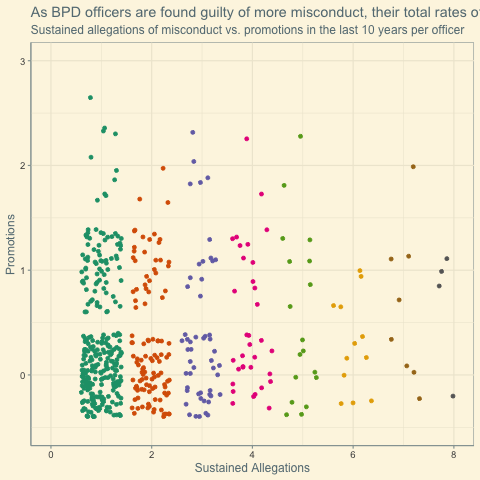

In [10]:
%%R -i test_df

library(ggplot2)
library(ggthemes)
filtered <- test_df[test_df$sustained > 0,]
filtered <- filtered[filtered$sustained < 10,]
ggplot(filtered) +
aes(x=sustained, y=promotions, color=factor(sustained), alpha=promotions) +
scale_color_brewer(palette="Dark2") +
theme(axis.ticks.x = element_blank()) +
xlim(-0, 8) +
ylim(-0.5, 3) +
geom_jitter(alpha = 2) +

theme_solarized() +
theme(legend.position="none") +
labs(title='As BPD officers are found guilty of more misconduct, their total rates of promotion still remain steady',subtitle='Sustained allegations of misconduct vs. promotions in the last 10 years per officer', x='Sustained Allegations', y='Promotions')

#ggsave('../output/sustainedvpromotions.png', width=10, height=6)


In [20]:
filtered1 = test_df[test_df['sustained'] > 0]
filtered1 = filtered1[filtered1['sustained'] < 10]
filtered1[filtered1.sustained==2].promotions.value_counts(normalize=True)

0    0.697248
1    0.275229
2    0.027523
Name: promotions, dtype: float64

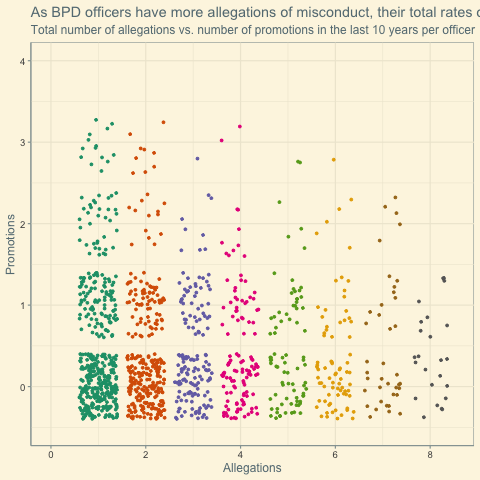

In [21]:
%%R -i test_df

library(ggplot2)
library(ggthemes)

filtered <- test_df[test_df$allegations > 0,]
filtered <- filtered[filtered$allegations < 15,]
ggplot(filtered) +
aes(x=allegations, y=promotions, color =factor(allegations)) +
xlim(0,8.5)+
ylim(-0.5,4)+

scale_color_brewer(palette="Dark2") +
geom_jitter(alpha=1, size=1) +
labs(title='As BPD officers have more allegations of misconduct, their total rates of promotion remain steady',subtitle='Total number of allegations vs. number of promotions in the last 10 years per officer', x='Allegations', y='Promotions') +
theme_solarized()+
theme(legend.position="none")

#ggsave('../output/allegations_vs_promotions.png', width=10, height=6)

In [28]:
filtered2 = test_df[test_df['allegations'] > 0]
filtered2 = filtered2[filtered2['allegations'] < 15]
filtered2.promotions.value_counts(normalize=True)


0    0.642188
1    0.265625
2    0.066406
3    0.022656
4    0.002344
5    0.000781
Name: promotions, dtype: float64

In [8]:
%%R -i test_df

library(ggplot2)
library(ggthemes)
library(stringr)
filtered <- test_df[test_df$allegations > 0,]
filtered <- filtered[filtered$allegations < 6,]
ggplot(filtered) +
aes(x=allegations, y=sustained, color=factor(allegations)) +
xlim(0,5.5)+
ylim(-0.5,5.5)+
geom_jitter(alpha=1) +
scale_color_brewer(palette="Dark2") +
labs(title=str_wrap("Regardless of the number of allegations against a BPD officer, it's likely they will never be found guilty",110),subtitle=str_wrap('Total number of allegations vs. allegations sustained by a Department investigation per officer',100), x='Allegations', y='Sustained Allegations')+
theme_solarized()+
theme(legend.position="none")

ggsave('../output/allegations_vs_sustained.png', width=10, height=6)